# Transformation and EDA

In [1]:
# Imports
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [2]:
# Loading in the cleaned and normalized data
df = pd.read_csv('data/reddit_post_cleaned_normalized.csv')

In [3]:
df['body'] = df['body'].fillna('')

In [4]:
df.head()

,title,body,subreddit,post_id
0,watch footage 70 lot time look better footage 90,dont know look good sharp despite pixelated ex...,explainlikeimfive,ivd7cz
1,spicy food felt mouth ie hot sauce felt sinus ...,,explainlikeimfive,a0xncr
2,bone know grow length,discussing friend yesterday trying work bone k...,askscience,1czga5y
3,type fiber,hold crap together make loose help go stay reg...,explainlikeimfive,1j8fu34
4,dont eat period time sometimes feel nauseous p...,,explainlikeimfive,cnvbvv


In [5]:
df.isnull().sum()

title        0
body         0
subreddit    0
post_id      0
dtype: int64

We are now ready to move on to vectorization to prepare the data for classification. We have several approches to choose from to address vectorization but I believe our model will best benefit from TF-IDF Vectorization to give significance to important words rather than common ones. We will limit the features (words) to 500 for now.

In [7]:
# Initializing TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Combining title and body text
df['combined_text'] = df['title'] + ' ' + df['body']

# Applying TF-IDF transformation
X = tfidf_vectorizer.fit_transform(df['combined_text'])

# Checking shape of the transformed matrix
print(f"TF-IDF Matrix Shape: {X.shape}")

TF-IDF Matrix Shape: (2692, 1000)


/var/folders/k9/3tn6m1vs7vv28wc7bsh3y12m0000gn/T/ipykernel_4729/2834817088.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words['tfidf_score'], y=top_words['word'], palette='viridis')


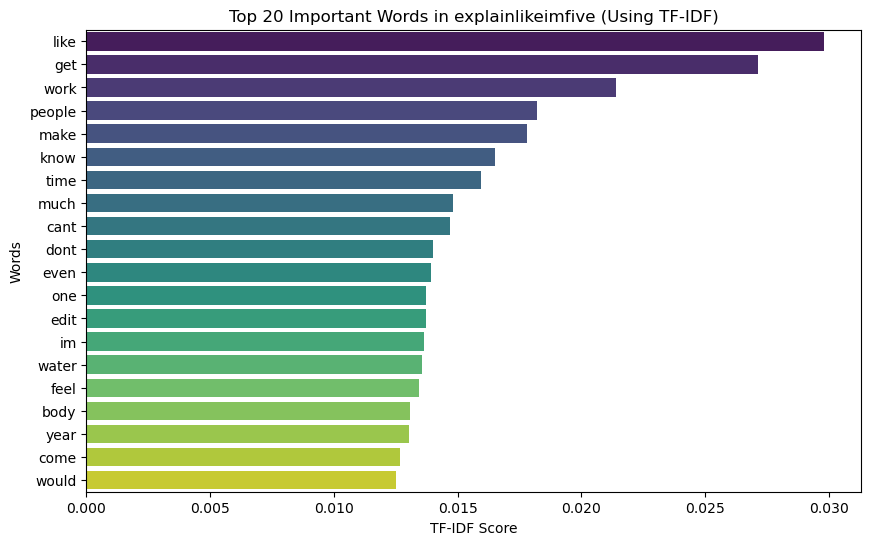

/var/folders/k9/3tn6m1vs7vv28wc7bsh3y12m0000gn/T/ipykernel_4729/2834817088.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words['tfidf_score'], y=top_words['word'], palette='viridis')


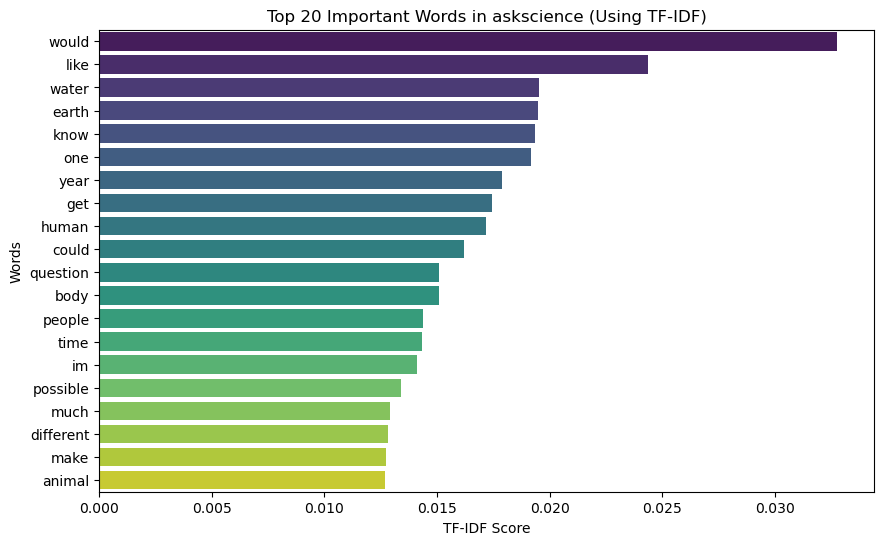

In [8]:
# Function to plot most important words by subreddit using TF-IDF (already vectorized)
def plot_most_important_words_by_subreddit(X, df, subreddit, n=20):
    subreddit_df = df[df['subreddit'] == subreddit]
    subreddit_indices = subreddit_df.index
    subreddit_tfidf_matrix = X[subreddit_indices, :]
    feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
    # Calculating the mean TF-IDF score for each word in this subreddit
    mean_tfidf_scores = subreddit_tfidf_matrix.mean(axis=0).A1
    # Creating a dataframe of words and their average TF-IDF scores
    tfidf_scores = pd.DataFrame(list(zip(feature_names, mean_tfidf_scores)), columns=['word', 'tfidf_score'])
    tfidf_scores = tfidf_scores.sort_values(by='tfidf_score', ascending=False)
    
    # Plotting the top n words(20)
    top_words = tfidf_scores.head(n)
    
    # Plot
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_words['tfidf_score'], y=top_words['word'], palette='viridis')
    plt.title(f"Top {n} Important Words in {subreddit} (Using TF-IDF)")
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Words")
    plt.show()

# Generating the plot for each subreddit
for subreddit in df['subreddit'].unique():
    plot_most_important_words_by_subreddit(X, df, subreddit, n=20)

Looking at the 20 important words by subreddit, I notice that in the ELIF sub reddit 'work' is now the top 3 most important word. This makes sense given that asking how something works is usually signifying to explain in simple terms. In the askscience subreddit, there are more science specific terms such as water, earth, year, human, etc.